In [21]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rcParams
from matplotlib import patches
import scipy.io
import astropy.constants as const
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
import fitting_template
import importlib
#from IPython.display import display, Math
from astropy.modeling import models, fitting, Fittable1DModel, Parameter
from scipy.optimize import curve_fit
importlib.reload(fitting_template)
import fitting_template
from fitting_template import FeXII_fit
from fitting_template import myGaussian1D
from fitting_template import myVoigt1D
import pandas as pd
from scipy.integrate import simps
import h5py
from scipy.optimize import curve_fit
plt.style.use('science')
rcParams['axes.linewidth'] = 1.2
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'cm'
from astropy.io import fits
import juanfit
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle, SpectrumFitRow

In [2]:
with fits.open("../raw_data/linewidth_calib/eis_l1_20070413_003236.fits") as hdul:
    hdul.info()
    print(hdul[1].header)
    print(hdul[1].data.shape)

Filename: ../raw_data/linewidth_calib/eis_l1_20070413_003236.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     132   ()      
  1  DATA          1 BinTableHDU    286   12R x 20C   [524288E, 524288E, 524288E, 524288E, 1D, 1D, 1D, 1D, 1I, 1I, 1B, 1B, 1B, 1J, 1J, 1I, 1E, 1E, 1E, 1E]   
XTENSION= 'BINTABLE'           /Written by IDL:  Thu Apr 19 04:29:57 2007       BITPIX  =                    8 /                                                NAXIS   =                    2 /Binary table                                    NAXIS1  =              8388673 / Number of bytes per row                        NAXIS2  =                   12 /Number of rows                                  PCOUNT  =                    0 /Random parameter count                          GCOUNT  =                    1 /Group count                                     TFIELDS =                   20 /Number of columns                               DATE    = '2007-04-18' 

 [astropy.io.fits.verify]


In [3]:
data_set_cor = scipy.io.readsav("../save/linewidth_calibration_tilt_cor_l1_20070413_00323.sav",verbose=False)

In [4]:
window_start_index = data_set_cor["window_start_index"]
window_end_index = data_set_cor["window_end_index"]
wvl = data_set_cor["wvl"]

In [5]:
data_set_cor["new_data_offset"].shape

(12, 534, 4096)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


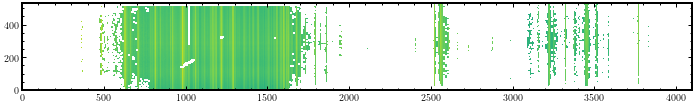

In [6]:
fig,ax1 = plt.subplots(figsize=(12,6))
i_raster= 1
ax1.imshow(np.log10(data_set_cor["new_data_offset"][i_raster,:,:]),origin="lower")
#ax2.imshow(np.log10(data_set_cor_repeat["new_data_offset"][i_raster,:,:]),origin="lower")

In [43]:
eis_img = np.mean(data_set_cor["new_data_offset"],axis=0)
eis_err = np.mean(data_set_cor["new_err_offset"],axis=0)
eis_img_aver = np.mean(eis_img[248:264,:],axis=0)
eis_err_aver = np.sqrt(np.sum(np.square(eis_err[248:264,:]),axis=0))/16

In [8]:
print("FeXV 284",np.argmin(np.abs(wvl-284)))
print("FeXII 193",np.argmin(np.abs(wvl-193.45)))
print("Si X 258",np.argmin(np.abs(wvl-258.37)))
print("Fe X 258",np.argmin(np.abs(wvl-258.37)))

FeXV 284 3765
FeXII 193 1217
Si X 258 2613
Fe X 258 2613


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


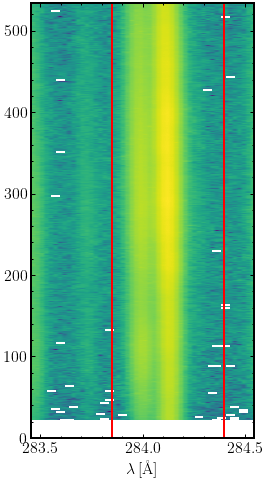

In [11]:
fig,ax1 = plt.subplots(figsize=(4,8))
ax1.imshow(np.log10(eis_img[:,3740:3790]),origin="lower",aspect="auto",
          extent=(wvl[3740],wvl[3789],-0.5,512+22-0.5))
#ax2.imshow(np.log10(data_set_cor_repeat["new_data_offset"][3,:,2506:2533]),origin="lower",aspect="auto",
#          extent=(wvl[2506],wvl[2533],-0.5,383+22-0.5))
for ax_ in (ax1,ax1):
    ax_.tick_params(labelsize=16)
    ax_.set_xlabel(r"$\lambda\,[\mbox{\AA}]$",fontsize=16)
    ax_.axvline(283.85,lw=2,color="red")
    ax_.axvline(284.4,lw=2,color="red")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


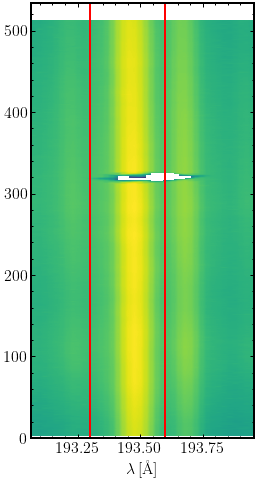

In [12]:
fig,ax1 = plt.subplots(figsize=(4,8))
ax1.imshow(np.log10(eis_img[:,1200:1240]),origin="lower",aspect="auto",
          extent=(wvl[1200],wvl[1240],-0.5,512+22-0.5))
#ax2.imshow(np.log10(data_set_cor_repeat["new_data_offset"][3,:,2506:2533]),origin="lower",aspect="auto",
#          extent=(wvl[2506],wvl[2533],-0.5,383+22-0.5))
for ax_ in (ax1,ax1):
    ax_.tick_params(labelsize=16)
    ax_.set_xlabel(r"$\lambda\,[\mbox{\AA}]$",fontsize=16)
    ax_.axvline(193.3,lw=2,color="red")
    ax_.axvline(193.6,lw=2,color="red")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


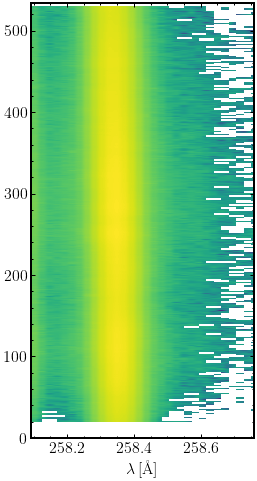

In [13]:
fig,ax1 = plt.subplots(figsize=(4,8))
ax1.imshow(np.log10(eis_img[:,2600:2630]),origin="lower",aspect="auto",
          extent=(wvl[2600],wvl[2630],-0.5,512+22-0.5))
#ax2.imshow(np.log10(data_set_cor_repeat["new_data_offset"][3,:,2506:2533]),origin="lower",aspect="auto",
#          extent=(wvl[2506],wvl[2533],-0.5,383+22-0.5))
for ax_ in (ax1,ax1):
    ax_.tick_params(labelsize=16)
    ax_.set_xlabel(r"$\lambda\,[\mbox{\AA}]$",fontsize=16)
    #ax_.axvline(193.3,lw=2,color="red")
    #ax_.axvline(193.6,lw=2,color="red")

In [14]:
print(np.argmin(np.abs(wvl-283.85)),np.argmin(np.abs(wvl-284.4)))
print(np.argmin(np.abs(wvl-193.3)),np.argmin(np.abs(wvl-193.6)))

3758 3783
1211 1224


In [15]:
FeXV_284_spec = eis_img[21:-1,3758:3784]
FeXV_284_wvl = wvl[3758:3784]
FeXII_193_spec = eis_img[2:514,1211:1224]
FeXII_193_wvl = wvl[1211:1224]
FeVIII_185_spec = eis_img[1:513,839:851]
FeVIII_185_wvl = wvl[839:851]
SiX_258_spec = eis_img[19:-3,2603:2624]
SiX_258_wvl = wvl[2603:2624]

In [16]:
#A function to average every N rows...
def avg_new(my_array, N=2):
    return ma.mean(my_array.reshape(-1,N,my_array.shape[-1]),axis=1)

def avg_err(my_array, N=2):
    my_reshape_sq = np.square(my_array.reshape(-1,N,my_array.shape[-1]))
    mask_reshape_sq = np.logical_not(my_reshape_sq.mask) * 1
    return np.sqrt(ma.sum(my_reshape_sq, axis = 1))/ma.sum(mask_reshape_sq, axis = 1)

In [17]:
FeVIII_185_spec_aver = avg_new(FeVIII_185_spec,4)

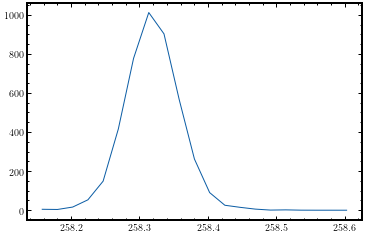

In [18]:
plt.plot(SiX_258_wvl,SiX_258_spec[-1,:])

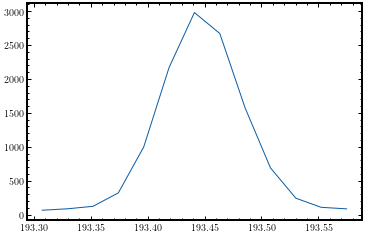

In [19]:
plt.plot(FeXII_193_wvl,FeXII_193_spec[-1,:])

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:203: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


array([[<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>],
       [<AxesSubplot:xlabel='$\\textrm{Wavelength}$', ylabel='Intensity'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

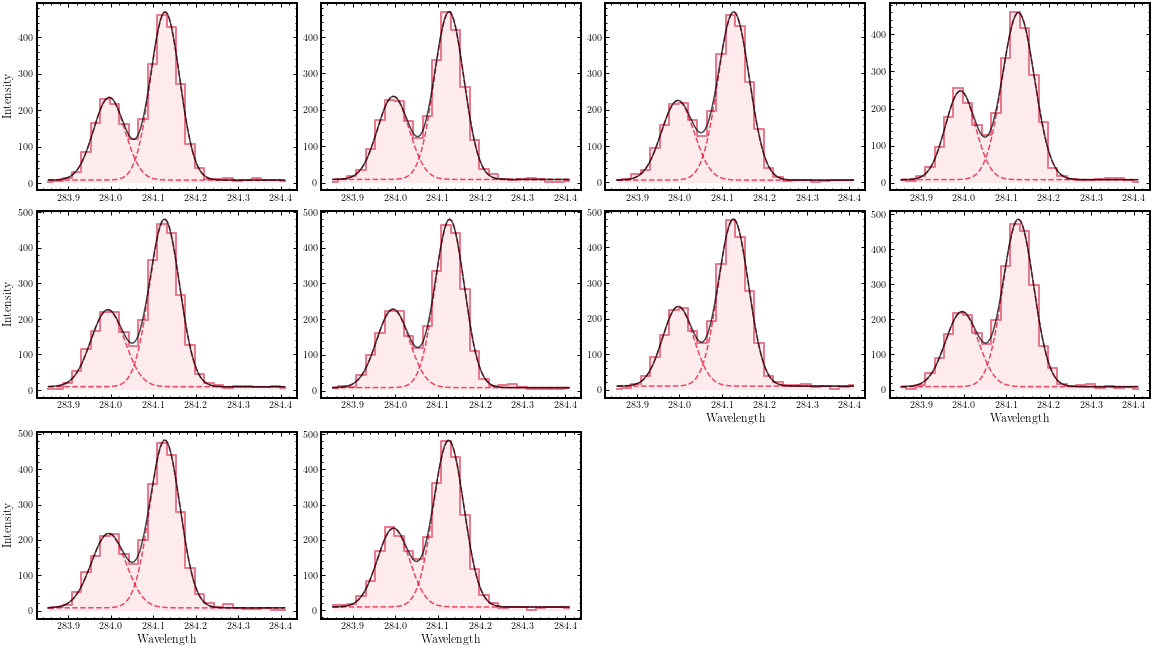

In [23]:
FeXV_284_nostray = SpectrumFitRow(data=FeXV_284_spec[100:110,:],wvl=FeXV_284_wvl,line_number=2,
                                    line_wvl_init=[283.95,284.1],int_max_init=[100,400],
                                    fwhm_init=[0.07,0.07],same_width=False)
FeXV_284_nostray.run_lse()
FeXV_284_nostray.plot_fit()

In [24]:
FeXV_284_nostray = SpectrumFitRow(data=FeXV_284_spec,wvl=FeXV_284_wvl,line_number=2,
                                    line_wvl_init=[283.95,284.1],int_max_init=[100,400],
                                    fwhm_init=[0.07,0.07],same_width=False)
FeXV_284_nostray.run_lse()

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:203: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


In [25]:
FeXV_284_fwhm = FeXV_284_nostray.fwhm_fit[:,1]
AlIX_284_fwhm = FeXV_284_nostray.fwhm_fit[:,0]

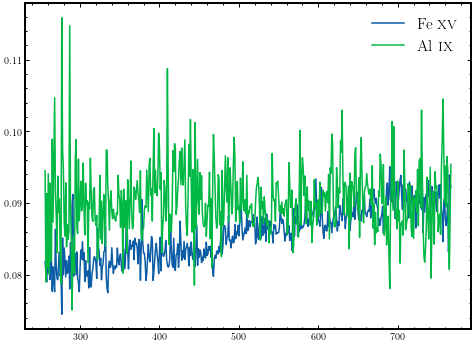

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.arange(512)+256,FeXV_284_fwhm,label=r"Fe \textsc{xv}",lw=1.5)
ax.plot(np.arange(512)+256,AlIX_284_fwhm,label=r"Al \textsc{ix}",lw=1.5)
plt.legend(fontsize=16)

In [27]:
c = const.c.cgs.value
amu = const.u.cgs.value
k_B = const.k_B.cgs.value
hplanck = const.h.cgs.value
plasma_temp = np.power(10,6.15)
plasma_temp_cool = np.power(10,5.95)
#thermal_width_FeXV_284 = 284.16/c*np.sqrt(4*np.log(2)*2*k_B*plasma_temp/amu/55.85)
thermal_width_FeXV_284 = 284.16/c*np.sqrt(4*np.log(2)*2*k_B*np.power(10,6.35)/amu/55.85)
#thermal_width_FeXII_193 = 193.5/c*np.sqrt(4*np.log(2)*2*k_B*plasma_temp/amu/55.85)
thermal_width_FeXII_193 = 193.5/c*np.sqrt(4*np.log(2)*2*k_B*np.power(10,6.22)/amu/55.85)
thermal_width_FeVIII_185 = 185.2/c*np.sqrt(4*np.log(2)*2*k_B*plasma_temp_cool/amu/55.85)
thermal_width_SiX_258 = 258.4/c*np.sqrt(4*np.log(2)*2*k_B*plasma_temp/amu/28.0855)

In [28]:
slit_width_512 = scipy.io.readsav("../save/slit_width.sav")["slit_width"] 

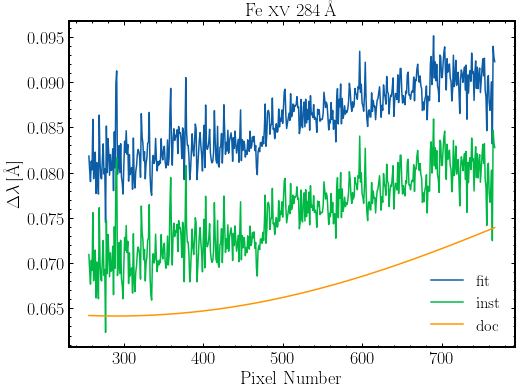

In [30]:
FeXV_284_fwhm_ins = np.sqrt(np.square(FeXV_284_fwhm) - np.square(thermal_width_FeXV_284))
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.arange(512)+256,FeXV_284_fwhm,label="fit",lw=1.5)
ax.plot(np.arange(512)+256,FeXV_284_fwhm_ins,label="inst",lw=1.5)
ax.plot(np.arange(512)+256,slit_width_512,label="doc",lw=1.5)
ax.tick_params(labelsize=18)
ax.set_xlabel("Pixel Number",fontsize=18)
ax.set_ylabel(r"$\Delta \lambda$\,[\mbox{\AA}]",fontsize=18)
ax.set_title(r"Fe \textsc{xv} 284\,\mbox{\AA}",fontsize=18)
plt.legend(fontsize=16)

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:203: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


array([[<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>],
       [<AxesSubplot:xlabel='$\\textrm{Wavelength}$', ylabel='Intensity'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

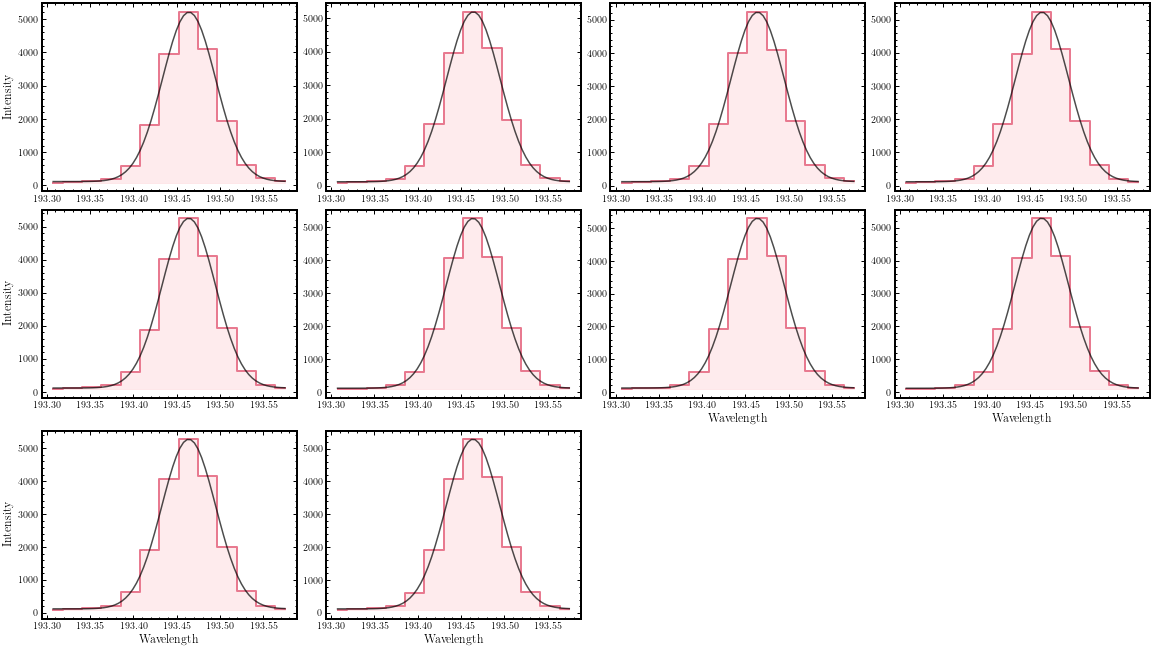

In [31]:
FeXII_193_nostray = SpectrumFitRow(data=FeXII_193_spec[100:110,:],wvl=FeXII_193_wvl,line_number=1,
                                    line_wvl_init=[193.45],int_max_init=[3000],
                                    fwhm_init=[0.07],same_width=True)
FeXII_193_nostray.run_lse()
FeXII_193_nostray.plot_fit()

In [32]:
FeXII_193_nostray_0_300 = SpectrumFitRow(data=FeXII_193_spec[0:300,:],wvl=FeXII_193_wvl,line_number=1,
                                    line_wvl_init=[193.45],int_max_init=[3000],
                                    fwhm_init=[0.07],same_width=True)
FeXII_193_nostray_0_300.run_lse()

FeXII_193_nostray_340_512 = SpectrumFitRow(data=FeXII_193_spec[340:,:],wvl=FeXII_193_wvl,line_number=1,
                                    line_wvl_init=[193.45],int_max_init=[3000],
                                    fwhm_init=[0.07],same_width=True)
FeXII_193_nostray_340_512.run_lse()

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:203: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


In [33]:
FeXII_193_fwhm_0_300 = FeXII_193_nostray_0_300.fwhm_fit
FeXII_193_fwhm_340_512 = FeXII_193_nostray_340_512.fwhm_fit

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:203: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


array([[<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='Intensity'>, <AxesSubplot:>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>],
       [<AxesSubplot:xlabel='$\\textrm{Wavelength}$', ylabel='Intensity'>,
        <AxesSubplot:xlabel='$\\textrm{Wavelength}$'>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

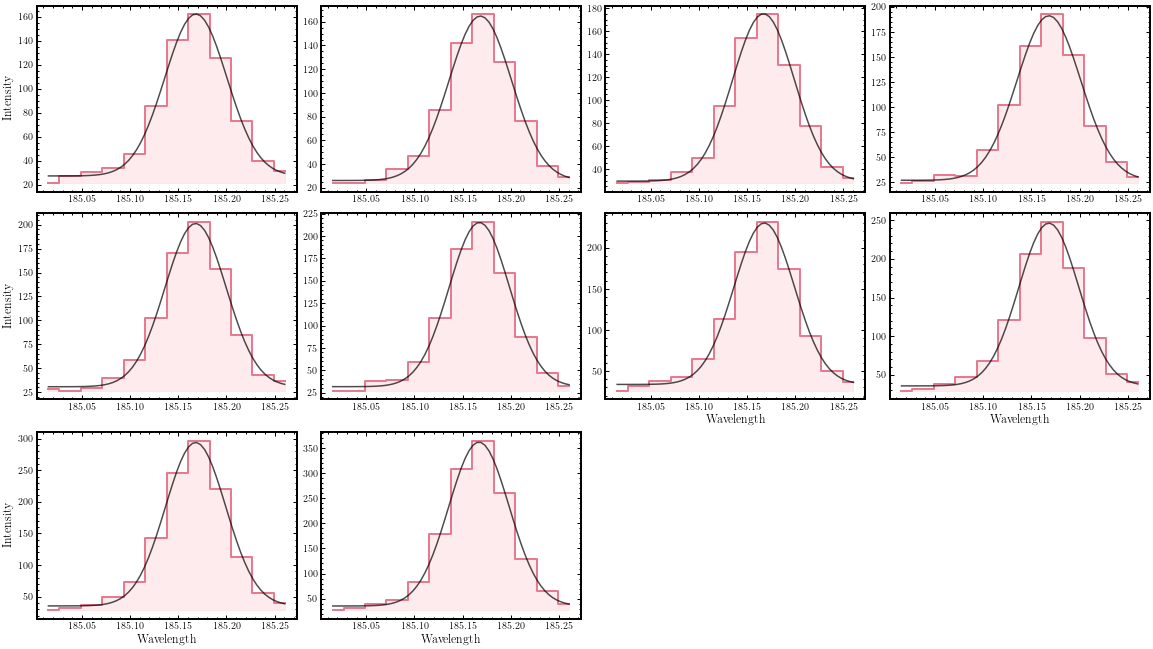

In [34]:
FeVIII_185_nostray = SpectrumFitRow(data=FeVIII_185_spec_aver[10:20,:],wvl=FeVIII_185_wvl,line_number=1,
                                    line_wvl_init=[185.15],int_max_init=[500],
                                    fwhm_init=[0.07],same_width=True)
FeVIII_185_nostray.run_lse()
FeVIII_185_nostray.plot_fit()

In [35]:
FeVIII_185_nostray = SpectrumFitRow(data=FeVIII_185_spec_aver,wvl=FeVIII_185_wvl,line_number=1,
                                    line_wvl_init=[185.15],int_max_init=[500],
                                    fwhm_init=[0.07],same_width=True)
FeVIII_185_nostray.run_lse()
FeVIII_185_aver_fwhm = FeVIII_185_nostray.fwhm_fit

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:203: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


In [36]:
SiX_258_nostray = SpectrumFitRow(data=SiX_258_spec,wvl=SiX_258_wvl,line_number=1,
                                    line_wvl_init=[258.32],int_max_init=[500],
                                    fwhm_init=[0.07],same_width=True)
SiX_258_nostray.run_lse()
SiX_258_fwhm = SiX_258_nostray.fwhm_fit

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:203: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


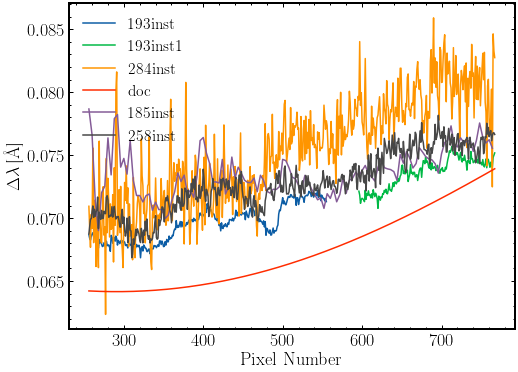

In [37]:
FeXV_284_fwhm_ins = np.sqrt(np.square(FeXV_284_fwhm) - np.square(thermal_width_FeXV_284))
FeXII_193_fwhm_ins_0_300 = np.sqrt(np.square(FeXII_193_fwhm_0_300) - np.square(thermal_width_FeXII_193))
FeXII_193_fwhm_ins_340_512 = np.sqrt(np.square(FeXII_193_fwhm_340_512) - np.square(thermal_width_FeXII_193))
FeVIII_185_fwhm_ins = np.sqrt(np.square(FeVIII_185_aver_fwhm)-np.square(thermal_width_FeVIII_185))
SiX_258_fwhm_ins = np.sqrt(np.square(SiX_258_fwhm)-np.square(thermal_width_SiX_258))
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.arange(300)+256,FeXII_193_fwhm_ins_0_300,label="193inst",lw=1.5)
ax.plot(np.arange(512-340)+340+256,FeXII_193_fwhm_ins_340_512,label="193inst1",lw=1.5)
ax.plot(np.arange(512)+256,FeXV_284_fwhm_ins,label="284inst",lw=1.5)
ax.plot(np.arange(512)+256,slit_width_512,label="doc",lw=1.5)
ax.plot(np.arange(0,512,4)+256,FeVIII_185_fwhm_ins,label="185inst",lw=1.5)
ax.plot(np.arange(512)+256,SiX_258_fwhm_ins,label="258inst",lw=1.5)
ax.tick_params(labelsize=18)
ax.set_xlabel("Pixel Number",fontsize=18)
ax.set_ylabel(r"$\Delta \lambda$\,[\mbox{\AA}]",fontsize=18)
#ax.set_title(r"Fe \textsc{xv} 284 \mbox{\AA}",fontsize=18)
plt.legend(fontsize=16)

In [38]:
np.argmin(np.abs(wvl-186.59))

910

In [40]:
FeXI_line_set_wvl = np.zeros(50)
FeXI_line_set_fwhm = np.zeros(50)
FeXI_line_set_fwhm_err = np.zeros(50)

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:203: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


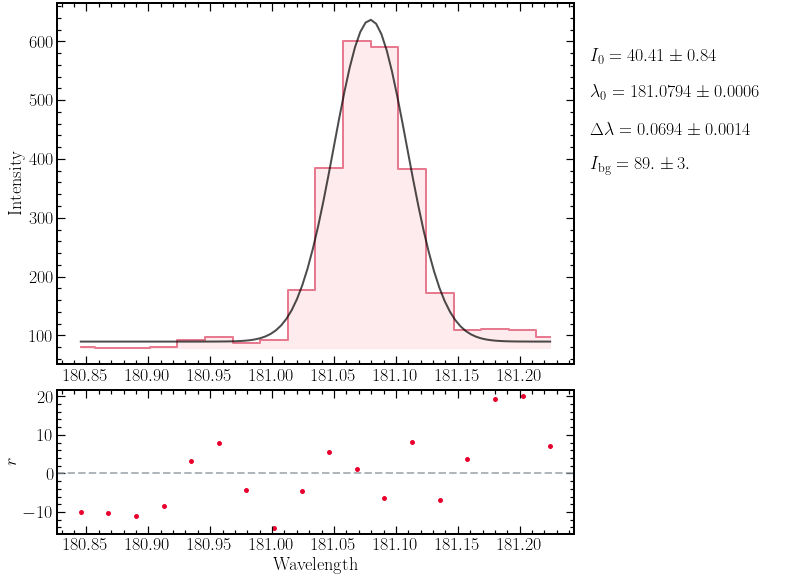

In [44]:
pixel_l = 652
pixel_r = 670
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=1,
                                    line_wvl_init=[181.08],int_max_init=[120],
                                    fwhm_init=[0.07],same_width=True)
fit_model.run_lse()
fit_model.plot()
FeXI_line_set_wvl[1] = fit_model.line_wvl_fit
FeXI_line_set_fwhm[1] = fit_model.fwhm_fit
FeXI_line_set_fwhm_err[1] = fit_model.fwhm_err

[0.07342071 0.07511891]
[0.00024051 0.00118558]


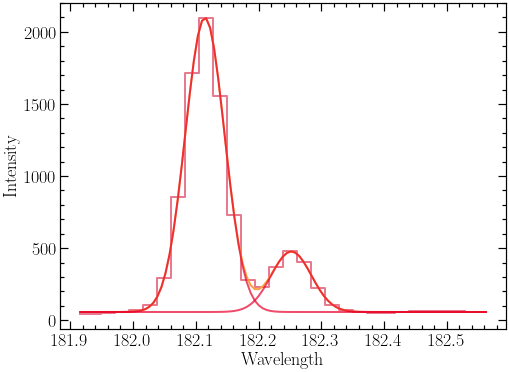

In [143]:
pixel_l = 700
pixel_r = 730
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=2,
                                    line_wvl_init=[182.1,182.25],int_max_init=[2000,500],
                                    fwhm_init=[0.07,0.07],same_width=False)
fit_model.run_lse()
fit_model.plot()
FeXI_line_set_wvl[2] = fit_model.line_wvl_fit[0]
FeXI_line_set_fwhm[2] = fit_model.fwhm_fit[0]
FeXI_line_set_fwhm_err[2] = fit_model.fwhm_err[0]

0.07451225293056322
0.0003248061002923285


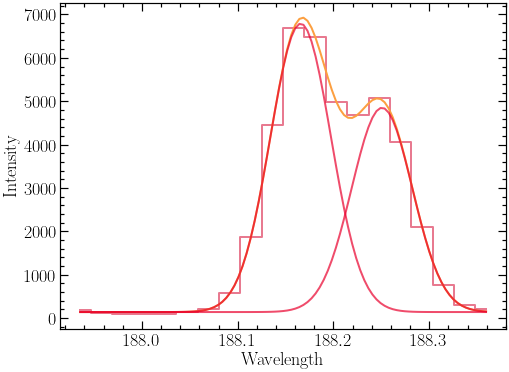

In [151]:
pixel_l = 970
pixel_r = 990
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=2,
                                    line_wvl_init=[188.16,188.21],int_max_init=[10000,10000],
                                    fwhm_init=[0.07],same_width=True)
fit_model.run_lse()
fit_model.plot()
FeXI_line_set_wvl[3] = fit_model.line_wvl_fit[0]
FeXI_line_set_fwhm[3] = fit_model.fwhm_fit
FeXI_line_set_fwhm_err[3] = fit_model.fwhm_err

0.07528457609768578
0.002037173283751258


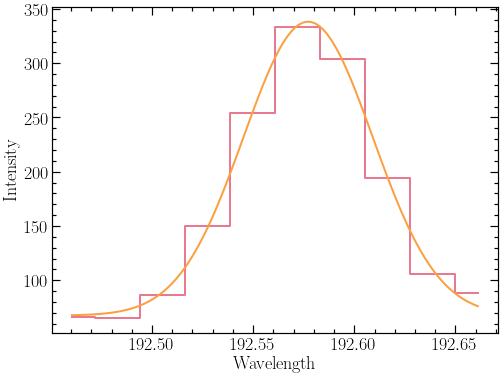

In [160]:
pixel_l = 1173
pixel_r = 1183
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=1,
                                    line_wvl_init=[192.6],int_max_init=[1000],
                                    fwhm_init=[0.07],same_width=True)
fit_model.run_lse()
fit_model.plot()
FeXI_line_set_wvl[4] = fit_model.line_wvl_fit[0]
FeXI_line_set_fwhm[4] = fit_model.fwhm_fit
FeXI_line_set_fwhm_err[4] = fit_model.fwhm_err

0.07533938358301835
0.00039605401903882896


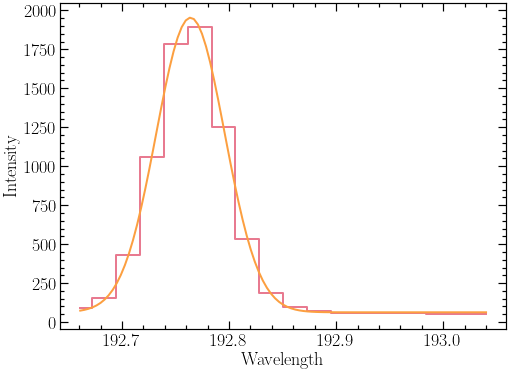

In [157]:
pixel_l = 1182
pixel_r = 1200
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=1,
                                    line_wvl_init=[192.8],int_max_init=[1000],
                                    fwhm_init=[0.07],same_width=True)
fit_model.run_lse()
fit_model.plot()
FeXI_line_set_wvl[5] = fit_model.line_wvl_fit[0]
FeXI_line_set_fwhm[5] = fit_model.fwhm_fit
FeXI_line_set_fwhm_err[5] = fit_model.fwhm_err

0.075823467125401
0.0003623575035219


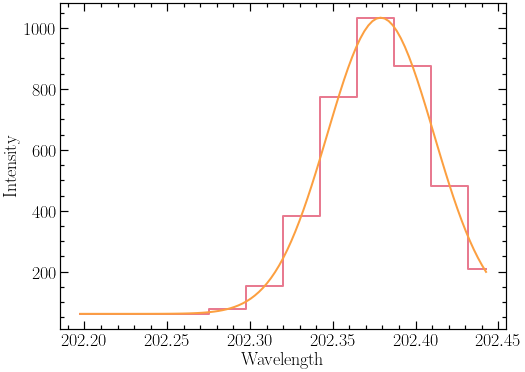

In [167]:
pixel_l = 1610
pixel_r = 1622
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=1,
                                    line_wvl_init=[202.35],int_max_init=[1000],
                                    fwhm_init=[0.07],same_width=True)
fit_model.run_lse()
fit_model.plot()
FeXI_line_set_wvl[6] = fit_model.line_wvl_fit[0]
FeXI_line_set_fwhm[6] = fit_model.fwhm_fit
FeXI_line_set_fwhm_err[6] = fit_model.fwhm_err

0.07831223777107199
0.0006510433243974646


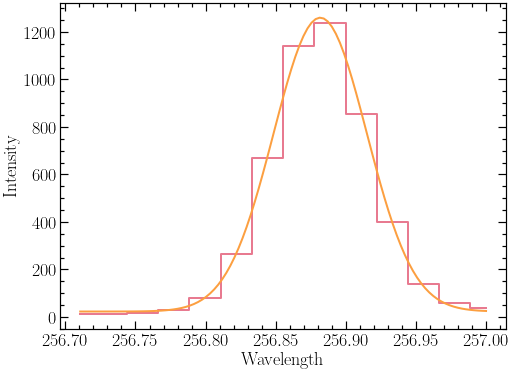

In [173]:
pixel_l = 2538
pixel_r = 2552
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=1,
                                    line_wvl_init=[256.89],int_max_init=[1000],
                                    fwhm_init=[0.07],same_width=True)
fit_model.run_lse()
fit_model.plot()
FeXI_line_set_wvl[7] = fit_model.line_wvl_fit[0]
FeXI_line_set_fwhm[7] = fit_model.fwhm_fit
FeXI_line_set_fwhm_err[7] = fit_model.fwhm_err

0.06126379238738512


Text(0.5, 1.0, 'Fe \\textsc{xi}')

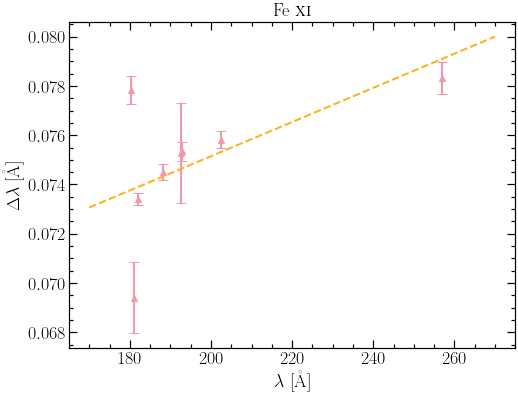

In [427]:
fig ,ax = plt.subplots(figsize=(8,6))
ax.errorbar(FeXI_line_set_wvl[:8],FeXI_line_set_fwhm[:8],FeXI_line_set_fwhm_err[:8],ls="none",lw=2,marker="^",capsize=5,color="#F596AA")
wvl_plot = np.linspace(170,270,101)
poly_param = np.polyfit(FeXI_line_set_wvl[2:8],FeXI_line_set_fwhm[2:8],deg=1,w=1./FeXI_line_set_fwhm_err[2:8]) 
poly_func = np.poly1d(poly_param)
poly_plot = poly_func(wvl_plot)
ax.plot(wvl_plot,poly_plot,color="#FFB11B",lw=2,ls="--")
ax.tick_params(labelsize=18)
ax.set_xlabel (r"$\lambda$ [\mbox{\AA}]",fontsize=18)
ax.set_ylabel("$\Delta \lambda$ [\mbox{\AA}]",fontsize=18)
ax.tick_params(which="major",width=1.2,length=8)
ax.tick_params(which="minor",width=1.2,length=4)
print(poly_func(0))
ax.set_title(r"Fe \textsc{xi}",fontsize=18)

0.07627366764016558
0.0007089913758806918


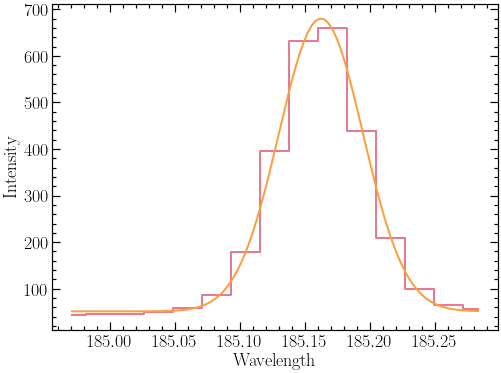

In [177]:
pixel_l = 837
pixel_r = 852
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=1,
                                    line_wvl_init=[185.15],int_max_init=[1000],
                                    fwhm_init=[0.07],same_width=True)
fit_model.run_lse()
fit_model.plot()

0.08066229663281774
0.0016725382013908837


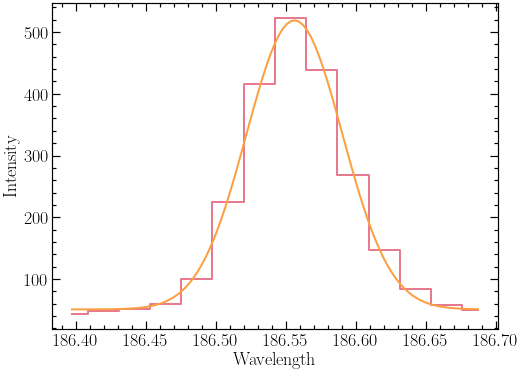

In [185]:
pixel_l = 901
pixel_r = 915
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=1,
                                    line_wvl_init=[186.55],int_max_init=[1000],
                                    fwhm_init=[0.07],same_width=True)
fit_model.run_lse()
fit_model.plot()

Wavelength: [253.74788832 253.90426545]
Width: [0.08196803 0.074804  ]
Width Error: [0.00031216 0.0020924 ]


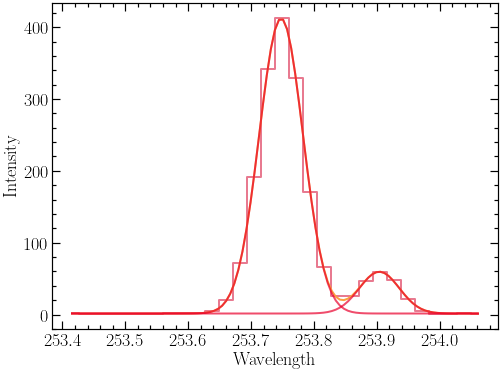

In [286]:
pixel_l = 2390
pixel_r = 2420
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=2,
                                    line_wvl_init=[253.75,253.9],int_max_init=[400,80],
                                    fwhm_init=[0.07,0.07],same_width=False)
fit_model.run_lse()
fit_model.plot()

In [358]:
FeXII_line_set_wvl = np.zeros(7)
FeXII_line_set_fwhm = np.zeros(7)
FeXII_line_set_fwhm_err = np.zeros(7)

In [311]:
np.argmin(np.abs(wvl-291))

4080

Wavelength: [186.8270162  186.93835368]
Width: [ 0.08668008 -0.06214599]
Width Error: [0.00106832 0.00614419]


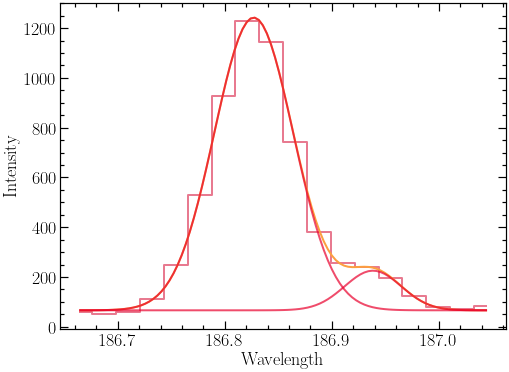

In [359]:
pixel_l = 913
pixel_r = 931
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=2,
                                    line_wvl_init=[186.85,186.95],int_max_init=[1200,80],
                                    fwhm_init=[0.07,0.07],same_width=False)
fit_model.run_lse()
fit_model.plot()
FeXII_line_set_wvl[0] = fit_model.line_wvl_fit[0]
FeXII_line_set_fwhm[0] = fit_model.fwhm_fit[0]
FeXII_line_set_fwhm_err[0] = fit_model.fwhm_err[0]

Wavelength: [192.3442643]
Width: 0.07463970464649929
Width Error: 0.0006600258718911691


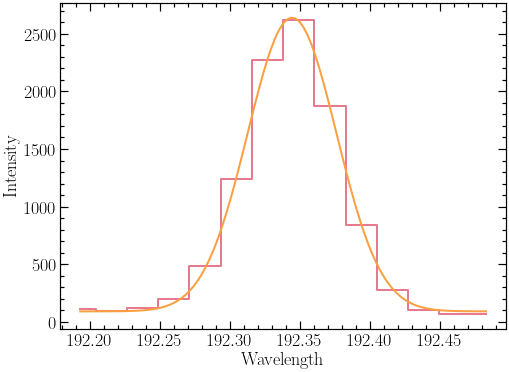

In [360]:
pixel_l = 1161
pixel_r = 1175
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=1,
                                    line_wvl_init=[192.34],int_max_init=[1000],
                                    fwhm_init=[0.07],same_width=True)
fit_model.run_lse()
fit_model.plot()
FeXII_line_set_wvl[1] = fit_model.line_wvl_fit
FeXII_line_set_fwhm[1] = fit_model.fwhm_fit
FeXII_line_set_fwhm_err[1] = fit_model.fwhm_err

Wavelength: [193.45899418 193.66291301]
Width: [0.07652146 0.07358481]
Width Error: [0.00041433 0.00476705]


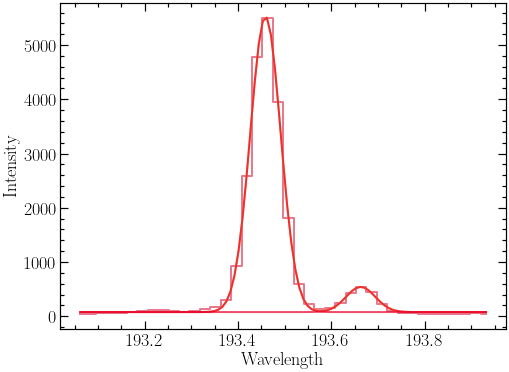

In [361]:
pixel_l = 1200
pixel_r = 1240
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=2,
                                    line_wvl_init=[193.45,193.65],int_max_init=[5000,500],
                                    fwhm_init=[0.07,0.07],same_width=False)
fit_model.run_lse()
fit_model.plot()
FeXII_line_set_wvl[2] = fit_model.line_wvl_fit[0]
FeXII_line_set_fwhm[2] = fit_model.fwhm_fit[0]
FeXII_line_set_fwhm_err[2] = fit_model.fwhm_err[0]

Wavelength: [195.07036973]
Width: 0.08661615905465689
Width Error: 0.0015353452643959414


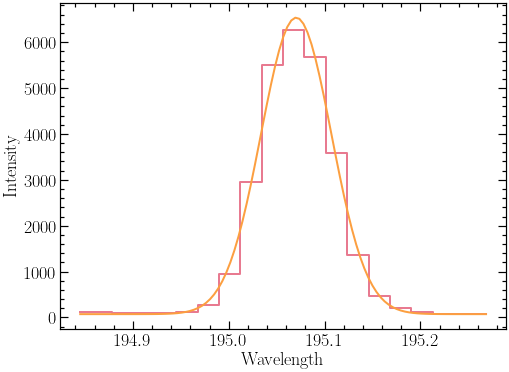

In [362]:
pixel_l = 1280
pixel_r = 1300
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=1,
                                    line_wvl_init=[195.05],int_max_init=[10000],
                                    fwhm_init=[0.07],same_width=True)
fit_model.run_lse()
fit_model.plot()
FeXII_line_set_wvl[3] = fit_model.line_wvl_fit
FeXII_line_set_fwhm[3] = fit_model.fwhm_fit
FeXII_line_set_fwhm_err[3] = fit_model.fwhm_err

Wavelength: [203.67738571 203.77414819]
Width: [0.0794328  0.08522021]
Width Error: [0.00134398 0.00104511]


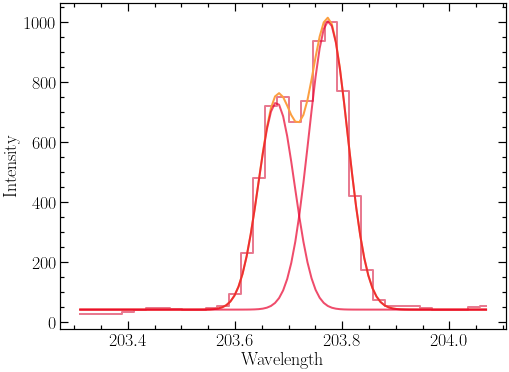

In [363]:
pixel_l = 1660
pixel_r = 1695
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=2,
                                    line_wvl_init=[203.7,203.8],int_max_init=[800,1000],
                                    fwhm_init=[0.07,0.07],same_width=False)
fit_model.run_lse()
fit_model.plot()
FeXII_line_set_wvl[4] = fit_model.line_wvl_fit[0]
FeXII_line_set_fwhm[4] = fit_model.fwhm_fit[0]
FeXII_line_set_fwhm_err[4] = fit_model.fwhm_err[0]

Wavelength: [249.33946149]
Width: 0.07167203970123354
Width Error: 0.0003459723199391088


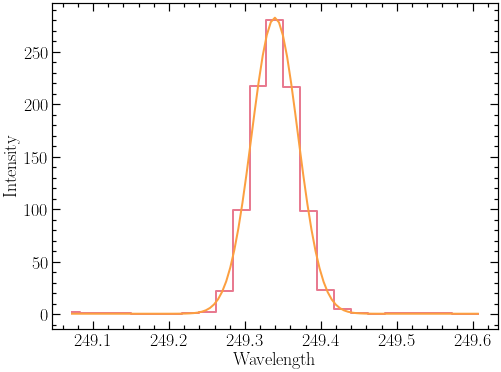

In [364]:
pixel_l = 2195
pixel_r = 2220
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=1,
                                    line_wvl_init=[249.35],int_max_init=[1000],
                                    fwhm_init=[0.07],same_width=True)
fit_model.run_lse()
fit_model.plot()
FeXII_line_set_wvl[5] = fit_model.line_wvl_fit
FeXII_line_set_fwhm[5] = fit_model.fwhm_fit
FeXII_line_set_fwhm_err[5] = fit_model.fwhm_err

Wavelength: [290.97519182]
Width: 0.07449507582847684
Width Error: 0.0008503985879413749


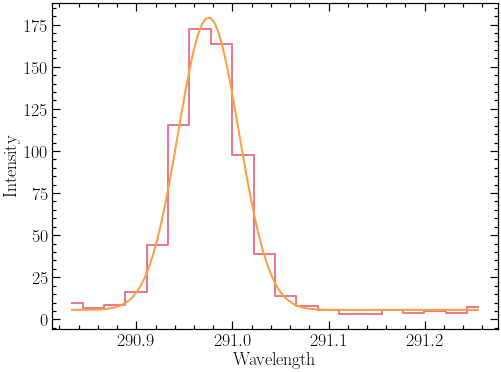

In [365]:
pixel_l = 4072
pixel_r = 4092
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=1,
                                    line_wvl_init=[291.00],int_max_init=[1000],
                                    fwhm_init=[0.07],same_width=True)
fit_model.run_lse()
fit_model.plot()
FeXII_line_set_wvl[6] = fit_model.line_wvl_fit
FeXII_line_set_fwhm[6] = fit_model.fwhm_fit
FeXII_line_set_fwhm_err[6] = fit_model.fwhm_err

Text(0.5, 1.0, 'Fe \\textsc{xii}')

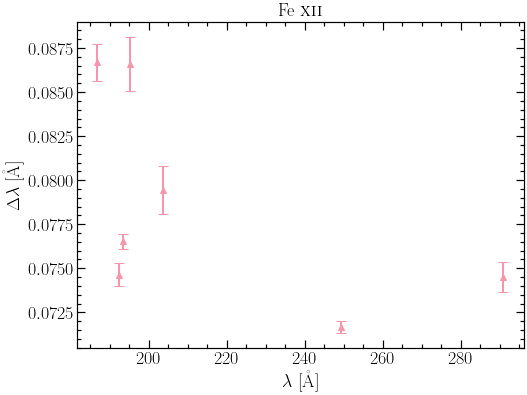

In [428]:
fig ,ax = plt.subplots(figsize=(8,6))
ax.errorbar(FeXII_line_set_wvl,FeXII_line_set_fwhm,FeXII_line_set_fwhm_err,ls="none",lw=2,marker="^",capsize=5,color="#F596AA")
#wvl_plot = np.linspace(170,270,101)
#poly_param = np.polyfit(FeXI_line_set_wvl[2:8],FeXI_line_set_fwhm[2:8],deg=1,w=1./FeXI_line_set_fwhm_err[2:8]) 
#poly_func = np.poly1d(poly_param)
#poly_plot = poly_func(wvl_plot)
#ax.plot(wvl_plot,poly_plot,color="#FFB11B",lw=2,ls="--")
ax.tick_params(labelsize=18)
ax.set_xlabel (r"$\lambda$ [\mbox{\AA}]",fontsize=18)
ax.set_ylabel("$\Delta \lambda$ [\mbox{\AA}]",fontsize=18)
ax.tick_params(which="major",width=1.2,length=8)
ax.tick_params(which="minor",width=1.2,length=4)
ax.set_title(r"Fe \textsc{xii}",fontsize=18)

In [367]:
FeX_line_set_wvl = np.zeros(10)
FeX_line_set_fwhm = np.zeros(10)
FeX_line_set_fwhm_err = np.zeros(10)

In [406]:
np.argmin(np.abs(wvl-257.2))

2560

Wavelength: [174.47411508]
Width: 0.07460876246152907
Width Error: 0.00025169667503983684


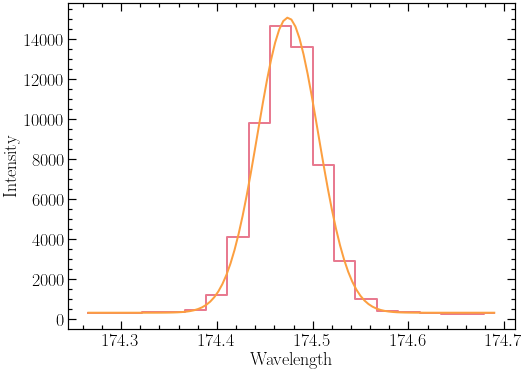

In [368]:
pixel_l = 357
pixel_r = 377
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=1,
                                    line_wvl_init=[174.5],int_max_init=[10000],
                                    fwhm_init=[0.07],same_width=True)
fit_model.run_lse()
fit_model.plot()
FeX_line_set_wvl[0] = fit_model.line_wvl_fit
FeX_line_set_fwhm[0] = fit_model.fwhm_fit
FeX_line_set_fwhm_err[0] = fit_model.fwhm_err

Wavelength: [175.20452016 175.40553916]
Width: [0.07714486 0.05180107]
Width Error: [0.00258949 0.00719284]


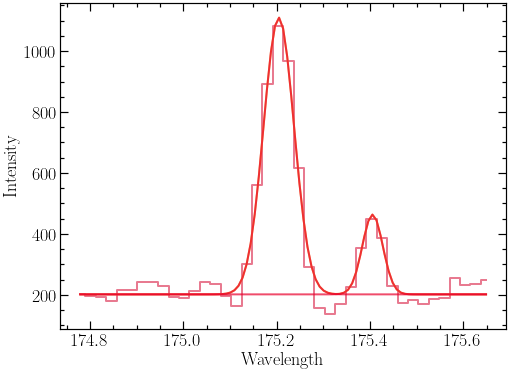

In [369]:
pixel_l = 380
pixel_r = 420
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=2,
                                    line_wvl_init=[175.2,175.4],int_max_init=[800,200],
                                    fwhm_init=[0.07,0.06],same_width=False)
fit_model.run_lse()
fit_model.plot()
FeX_line_set_wvl[1] = fit_model.line_wvl_fit[0]
FeX_line_set_fwhm[1] = fit_model.fwhm_fit[0]
FeX_line_set_fwhm_err[1] = fit_model.fwhm_err[0]

Wavelength: [177.18261289]
Width: 0.07460021059718719
Width Error: 0.0003577764229502762


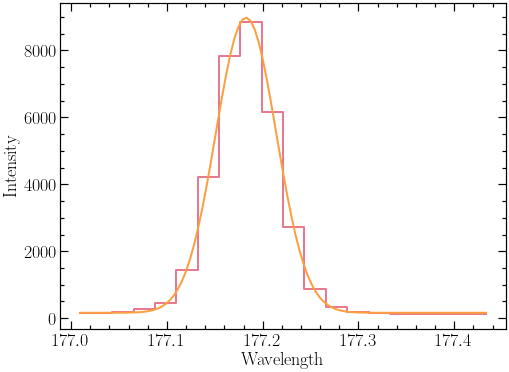

In [370]:
pixel_l = 480
pixel_r = 500
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=1,
                                    line_wvl_init=[177.2],int_max_init=[10000],
                                    fwhm_init=[0.07],same_width=True)
fit_model.run_lse()
fit_model.plot()
FeX_line_set_wvl[2] = fit_model.line_wvl_fit
FeX_line_set_fwhm[2] = fit_model.fwhm_fit
FeX_line_set_fwhm_err[2] = fit_model.fwhm_err

Wavelength: [182.11450926 182.2522137 ]
Width: [0.07342072 0.07511881]
Width Error: [0.00024051 0.00118551]


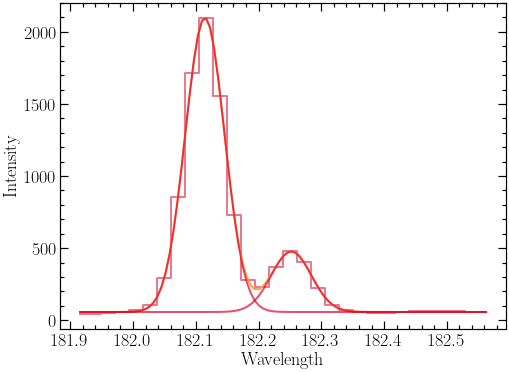

In [371]:
pixel_l = 700
pixel_r = 730
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=2,
                                    line_wvl_init=[182.1,182.25],int_max_init=[800,200],
                                    fwhm_init=[0.07,0.06],same_width=False)
fit_model.run_lse()
fit_model.plot()
FeX_line_set_wvl[3] = fit_model.line_wvl_fit[1]
FeX_line_set_fwhm[3] = fit_model.fwhm_fit[1]
FeX_line_set_fwhm_err[3] = fit_model.fwhm_err[1]

Wavelength: [184.48493724]
Width: 0.07354836517210782
Width Error: 0.0007842193804086725


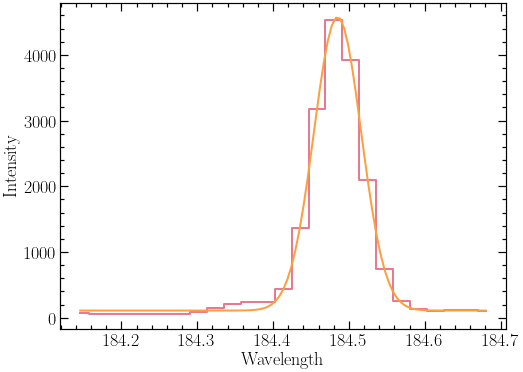

In [372]:
pixel_l = 800
pixel_r = 825
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=1,
                                    line_wvl_init=[184.5],int_max_init=[10000],
                                    fwhm_init=[0.07],same_width=True)
fit_model.run_lse()
fit_model.plot()
FeX_line_set_wvl[4] = fit_model.line_wvl_fit
FeX_line_set_fwhm[4] = fit_model.fwhm_fit
FeX_line_set_fwhm_err[4] = fit_model.fwhm_err

Wavelength: [189.88677692 189.98720667]
Width: [0.06894377 0.07583014]
Width Error: [0.00276341 0.00095195]


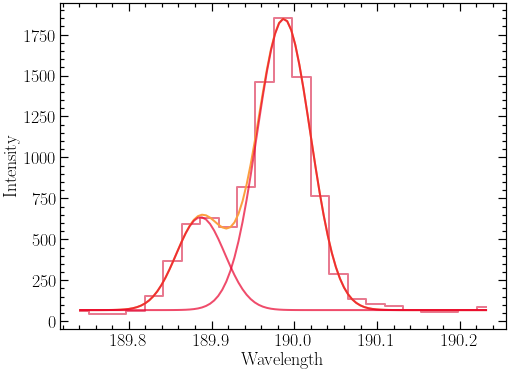

In [374]:
pixel_l = 1051
pixel_r = 1074
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=2,
                                    line_wvl_init=[189.9,190.0],int_max_init=[800,2000],
                                    fwhm_init=[0.07,0.06],same_width=False)
fit_model.run_lse()
fit_model.plot()
FeX_line_set_wvl[5] = fit_model.line_wvl_fit[1]
FeX_line_set_fwhm[5] = fit_model.fwhm_fit[1]
FeX_line_set_fwhm_err[5] = fit_model.fwhm_err[1]

Wavelength: [193.66300283]
Width: 0.07937109429245919
Width Error: 0.0020910826240228613


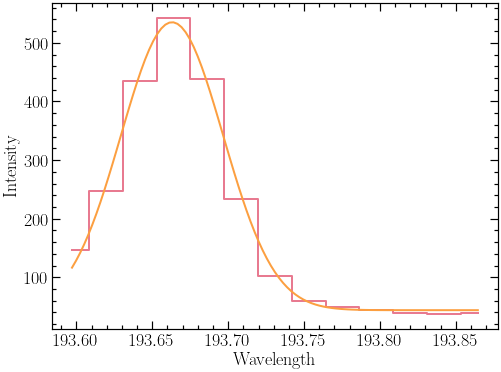

In [387]:
pixel_l = 1224
pixel_r = 1237
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=1,
                                    line_wvl_init=[193.66],int_max_init=[1000],
                                    fwhm_init=[0.07],same_width=True)
fit_model.run_lse()
fit_model.plot()
FeX_line_set_wvl[6] = fit_model.line_wvl_fit
FeX_line_set_fwhm[6] = fit_model.fwhm_fit
FeX_line_set_fwhm_err[6] = fit_model.fwhm_err

Wavelength: [207.39962171]
Width: 0.07599659591354813
Width Error: 0.0007552166225155316


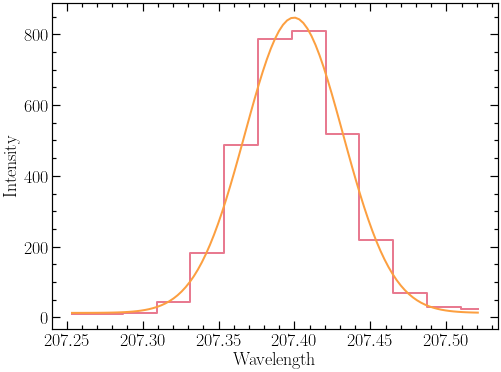

In [398]:
pixel_l = 1837
pixel_r = 1850
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=1,
                                    line_wvl_init=[207.4],int_max_init=[200],
                                    fwhm_init=[0.07],same_width=True)
fit_model.run_lse()
fit_model.plot()
FeX_line_set_wvl[7] = fit_model.line_wvl_fit
FeX_line_set_fwhm[7] = fit_model.fwhm_fit
FeX_line_set_fwhm_err[7] = fit_model.fwhm_err

Wavelength: [255.30249341 255.38640126]
Width: [0.07161619 0.07102932]
Width Error: [0.00297517 0.00112566]


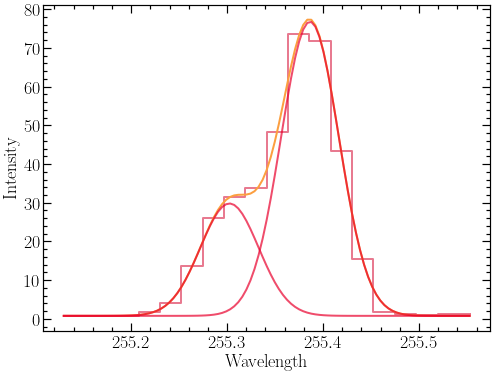

In [405]:
pixel_l = 2467
pixel_r = 2487
fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=2,
                                    line_wvl_init=[255.3,255.4],int_max_init=[30,70],
                                    fwhm_init=[0.07,0.06],same_width=False)
fit_model.run_lse()
fit_model.plot()
FeX_line_set_wvl[8] = fit_model.line_wvl_fit[1]
FeX_line_set_fwhm[8] = fit_model.fwhm_fit[1]
FeX_line_set_fwhm_err[8] = fit_model.fwhm_err[1]

Wavelength: [257.22135959]
Width: 0.07630117922765517
Width Error: 0.0019238224715451742


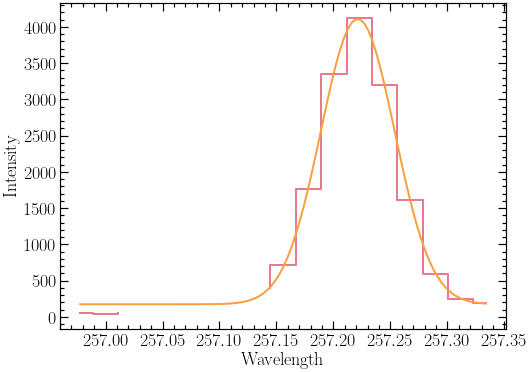

In [423]:
pixel_l = 2550
pixel_r = 2567
spec_fit = ma.array(eis_img_aver[pixel_l:pixel_r])
wvl_fit = ma.array(wvl[pixel_l:pixel_r])
spec_fit[3:7] = ma.masked
wvl_fit[3:7] = ma.masked
fit_model = SpectrumFitSingle(data=spec_fit,wvl=wvl_fit,line_number=1,
                                    line_wvl_init=[257.2],int_max_init=[1000],
                                    fwhm_init=[0.07],same_width=True)
#fit_model = SpectrumFitSingle(data=eis_img_aver[pixel_l:pixel_r],wvl=wvl[pixel_l:pixel_r],line_number=2,
#                                    line_wvl_init=[257.1,257.2],int_max_init=[30,70],
#                                    fwhm_init=[0.07,0.07],same_width=False)
fit_model.run_lse()
fit_model.plot()
FeX_line_set_wvl[9] = fit_model.line_wvl_fit
FeX_line_set_fwhm[9] = fit_model.fwhm_fit
FeX_line_set_fwhm_err[9] = fit_model.fwhm_err

Text(0.5, 1.0, 'Fe \\textsc{x}')

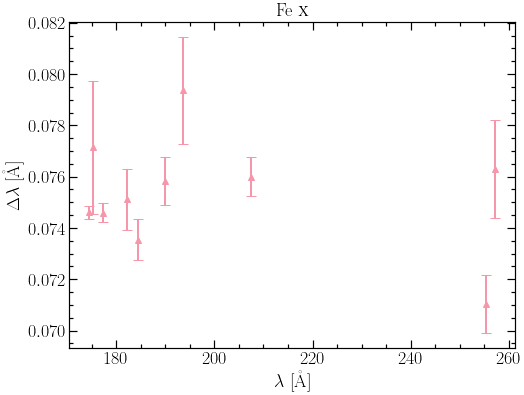

In [425]:
fig ,ax = plt.subplots(figsize=(8,6))
ax.errorbar(FeX_line_set_wvl,FeX_line_set_fwhm,FeX_line_set_fwhm_err,ls="none",lw=2,marker="^",capsize=5,color="#F596AA")
#wvl_plot = np.linspace(170,270,101)
#poly_param = np.polyfit(FeXI_line_set_wvl[2:8],FeXI_line_set_fwhm[2:8],deg=1,w=1./FeXI_line_set_fwhm_err[2:8]) 
#poly_func = np.poly1d(poly_param)
#poly_plot = poly_func(wvl_plot)
#ax.plot(wvl_plot,poly_plot,color="#FFB11B",lw=2,ls="--")
ax.tick_params(labelsize=18)
ax.set_xlabel (r"$\lambda$ [\mbox{\AA}]",fontsize=18)
ax.set_ylabel("$\Delta \lambda$ [\mbox{\AA}]",fontsize=18)
ax.tick_params(which="major",width=1.2,length=8)
ax.tick_params(which="minor",width=1.2,length=4)
ax.set_title(r"Fe \textsc{x}",fontsize=18)